# Visualising the Topic Modelling Results

This notebook visualises the results from the previous notebook containing topic models
* Section 1 - Import libraries and dataset
* Section 2 - Get sentiment analyser scores
* Section 3 - Category Analysis for Arun Distict
* Section 4 - Sentiment scores across categories
* Section 5 - Comparing Aspects and Towns


Datasets need to run notebook:
* topicmodelsaccom.csv
* topicmodelsfood.csv
* topicmodelsattract.csv




# Section 1: Import libraries and data

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\imoge\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [150]:
df_accom = pd.read_csv("topicmodelsaccom.csv")
df_food = pd.read_csv("topicmodelsfood.csv")
df_attract = pd.read_csv("topicmodelsattract.csv")

# Section 2: Get sentiment scores

In [152]:
# Apply sentiment to each line based on the noun-phrases and then put to positive or negative
sid = SentimentIntensityAnalyzer()
df_accom["Sentiment"] = df_accom["noun_phrases"].apply(lambda x: sid.polarity_scores(x)["compound"])
df_food["Sentiment"] = df_food["noun_phrases"].apply(lambda x: sid.polarity_scores(x)["compound"])
df_attract["Sentiment"] = df_attract["noun_phrases"].apply(lambda x: sid.polarity_scores(x)["compound"])

In [153]:
print(df_accom.shape,df_food.shape, df_attract.shape)

(23979, 12) (39687, 12) (7506, 12)


In [154]:
# Convert sentiment score to positive to negative with VADER (above 0.05 positive, below -0.05 negative and between is 
# neutral as per the VADER notes)
def polar(x): 
    if x >= 0.05:
        return 'positive'
    elif x <0.05 and x>= -0.05:
        return 'neutral'
    else:
        return 'negative'

In [155]:
# Apply function to dataframes
df_accom["Score"] = df_accom["Sentiment"].apply(lambda x: polar(x))
df_food["Score"] = df_food["Sentiment"].apply(lambda x: polar(x))
df_attract["Score"] = df_attract["Sentiment"].apply(lambda x: polar(x))
df_accom.head(2)

,Unnamed: 0,OrigInd,Category,Town,Rating,all_text,cleaned,noun_phrases,nouns,Topic Count,Topic TFIDF,Sentiment,Score
0,0,0,Accommodation,Bognor,4,"Nice break, shame about the accommodation... W...",nice break shame accommodation booked night st...,shame accommodation,"['shame', 'accommodation']",Location,Entertainment,-0.4767,negative
1,1,0,Accommodation,Bognor,4,"Nice break, shame about the accommodation... W...",nice break shame accommodation booked night st...,family adult kid,"['family', 'adult', 'kid']",FamilyExp,FamilyExp,0.0000,neutral


In [156]:
df_accom["Score"].value_counts()

neutral     13454
positive     8853
negative     1672
Name: Score, dtype: int64

In [157]:
df_food["Score"].value_counts()

neutral     20626
positive    16797
negative     2264
Name: Score, dtype: int64

In [158]:
df_attract["Score"].value_counts()

neutral     4013
positive    3141
negative     352
Name: Score, dtype: int64

# Section 3: Category Analysis

In [114]:
# Numbers of aspects split into positive and negative into one dataframe

def aspect_all(df):
    
    pos_df = df[df["Score"] == "positive"]
    neg_df = df[df["Score"] == "negative"]
    pos_df = pd.DataFrame(pos_df["Topic Count"].value_counts())
    neg_df = pd.DataFrame(neg_df["Topic Count"].value_counts())
    pos_df.columns = ["Num Pos"]
    neg_df.columns = ["Num Neg"]
    df_sent = pd.concat([pos_df,neg_df],axis = 1)
    df_sent["%Pos"] = round(df_sent["Num Pos"]/(df_sent["Num Pos"] + df_sent["Num Neg"]),2)*100
    df_sent["%Neg"] = round(df_sent["Num Neg"]/(df_sent["Num Pos"] + df_sent["Num Neg"]),2)*100
    df_sent.sort_index(inplace = True)
    return df_sent
    

In [173]:
def graph_sentiment_numbers(name,df):
    
    labels = list(df.index)
    pos = list(df["%Pos"])
    neg = list(df["%Neg"]*-1)

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize = (10,6))
    ax.barh(x - width/2, pos, width, label='Pos',color = "lightsteelblue")
    ax.barh(x + width/2, neg, width, label='Neg',color = "slategrey")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title(name + " - % Positive and Negative")
    ax.set_yticks(x)
    ax.set_yticklabels(labels)
    #("% of Aspect")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend(frameon = False, loc = "best")
    ax.invert_yaxis()

    fig.tight_layout()

    plt.show()

## Accomodation

In [134]:
accom_sent = aspect_all(df_accom)
accom_sent

,Num Pos,Num Neg,%Pos,%Neg
CustServ,389,92,81.0,19.0
FamilyExp,820,82,91.0,9.0
Food,736,90,89.0,11.0
HotelGen,392,43,90.0,10.0
Leisure,384,85,82.0,18.0
Location,759,129,85.0,15.0
MealExp,502,156,76.0,24.0
Parking&Fac,306,107,74.0,26.0
Room,1553,325,83.0,17.0
RoomComf,490,61,89.0,11.0


Review noun phrases are predominantly positive, with the highest % positive relating to the Family Experience and the lowest to Parking & Other Facilities

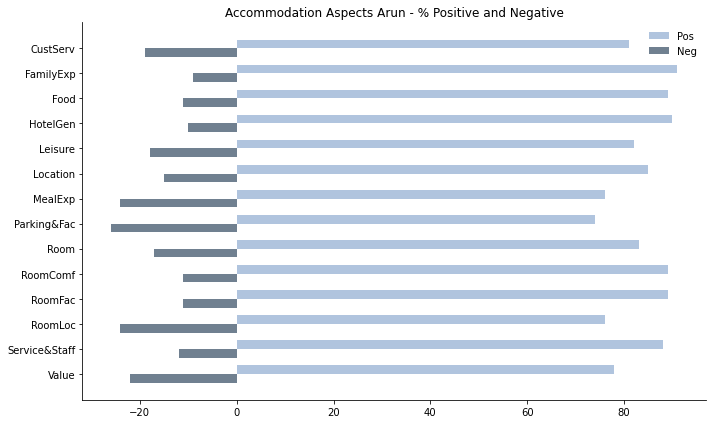

In [135]:
graph_sentiment_numbers("Accommodation Aspects Arun",accom_sent)

### Split down by town

In [136]:
arundel_accom_aspects_pos = df_accom[(df_accom["Town"] == "Arundel") & (df_accom["Score"] == "positive")]
arundel_accom_aspects_neg = df_accom[(df_accom["Town"] == "Bognor") & (df_accom["Score"] == "negative")]
bognor_accom_aspects_pos = df_accom[(df_accom["Town"] == "Bognor") & (df_accom["Score"] == "positive")]
bognor_accom_aspects_neg = df_accom[(df_accom["Town"] == "Bognor") & (df_accom["Score"] == "negative")]
little_accom_aspects_pos = df_accom[(df_accom["Town"] == "Littlehampton") & (df_accom["Score"] == "positive")]
little_accom_aspects_neg = df_accom[(df_accom["Town"] == "Littlehampton") & (df_accom["Score"] == "negative")]

In [137]:
# Create dataframe to compare percentages for each aspect for the town
def aspect_perc(df1,df2):
    df_pos = pd.DataFrame(df1["Topic Count"].value_counts())
    df_neg = pd.DataFrame(df2["Topic Count"].value_counts())
    df_comb = pd.concat([df_pos,df_neg],axis = 1)
    df_comb.columns = ["Num Pos","Num Neg"]
    df_comb["%Pos"] = round(df_comb["Num Pos"]/(df_comb["Num Pos"] + df_comb["Num Neg"]),2)*100
    df_comb["%Neg"] = round(df_comb["Num Neg"]/(df_comb["Num Neg"] + df_comb["Num Pos"]),2)*100
    df_comb.sort_index(inplace = True)
    
    return df_comb


### Arundel

In [138]:
arundel_percent = aspect_perc(arundel_accom_aspects_pos,arundel_accom_aspects_neg)
arundel_percent

,Num Pos,Num Neg,%Pos,%Neg
CustServ,115,49,70.0,30.0
FamilyExp,173,50,78.0,22.0
Food,257,39,87.0,13.0
HotelGen,159,21,88.0,12.0
Leisure,42,61,41.0,59.0
Location,272,72,79.0,21.0
MealExp,151,67,69.0,31.0
Parking&Fac,55,32,63.0,37.0
Room,555,185,75.0,25.0
RoomComf,158,31,84.0,16.0


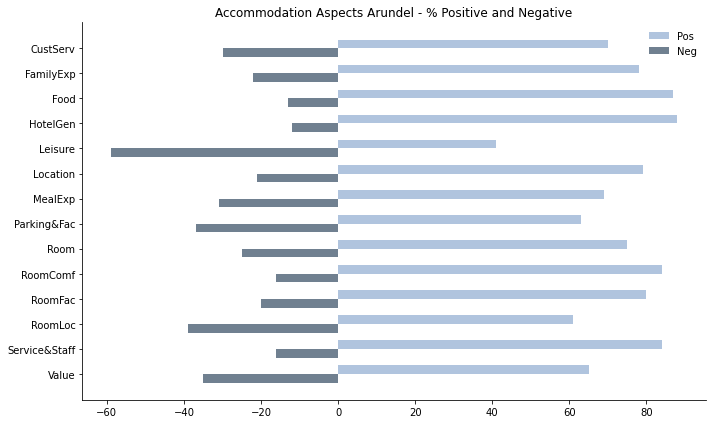

In [139]:
graph_sentiment_numbers("Accommodation Aspects Arundel",arundel_percent)

### Bognor

In [140]:
bognor_percent = aspect_perc(bognor_accom_aspects_pos,bognor_accom_aspects_neg)
bognor_percent

,Num Pos,Num Neg,%Pos,%Neg
CustServ,167,49,77.0,23.0
FamilyExp,484,50,91.0,9.0
Food,331,39,89.0,11.0
HotelGen,146,21,87.0,13.0
Leisure,256,61,81.0,19.0
Location,277,72,79.0,21.0
MealExp,217,67,76.0,24.0
Parking&Fac,158,32,83.0,17.0
Room,688,185,79.0,21.0
RoomComf,217,31,88.0,12.0


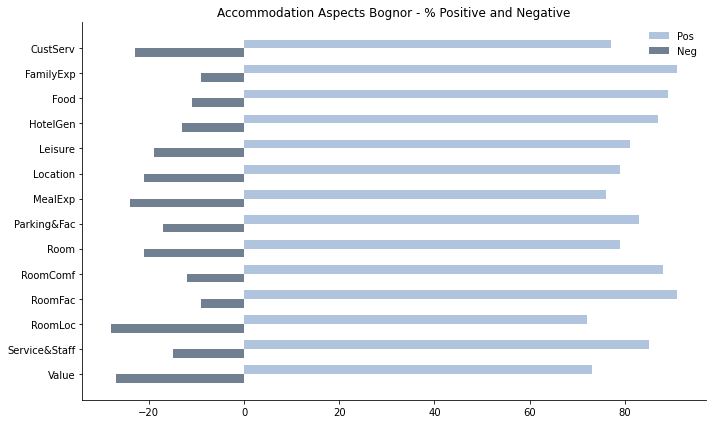

In [141]:
graph_sentiment_numbers("Accommodation Aspects Bognor",bognor_percent)

### Littlehampton

In [142]:
little_percent = aspect_perc(little_accom_aspects_pos,little_accom_aspects_neg)
little_percent

,Num Pos,Num Neg,%Pos,%Neg
CustServ,107,24,82.0,18.0
FamilyExp,163,13,93.0,7.0
Food,148,23,87.0,13.0
HotelGen,87,5,95.0,5.0
Leisure,86,14,86.0,14.0
Location,210,25,89.0,11.0
MealExp,134,38,78.0,22.0
Parking&Fac,93,30,76.0,24.0
Room,310,53,85.0,15.0
RoomComf,115,14,89.0,11.0


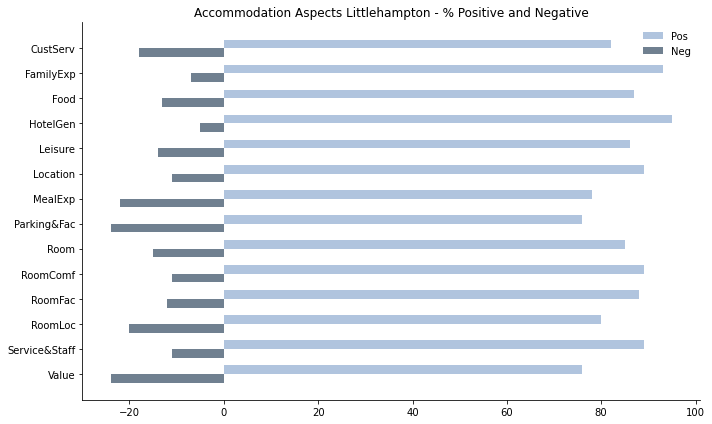

In [143]:
graph_sentiment_numbers("Accommodation Aspects Littlehampton",little_percent)

### Food

In [159]:
food_sent = aspect_all(df_food)
food_sent

,Num Pos,Num Neg,%Pos,%Neg
Booking&Table,937,221,81.0,19.0
Drinks&Ordering,907,194,82.0,18.0
FoodChoice,976,117,89.0,11.0
FoodGen,4520,491,90.0,10.0
FoodPort,651,75,90.0,10.0
MealExp,1281,158,89.0,11.0
Menu,812,79,91.0,9.0
Quality,955,172,85.0,15.0
Service,1820,262,87.0,13.0
StaffGen,1762,249,88.0,12.0


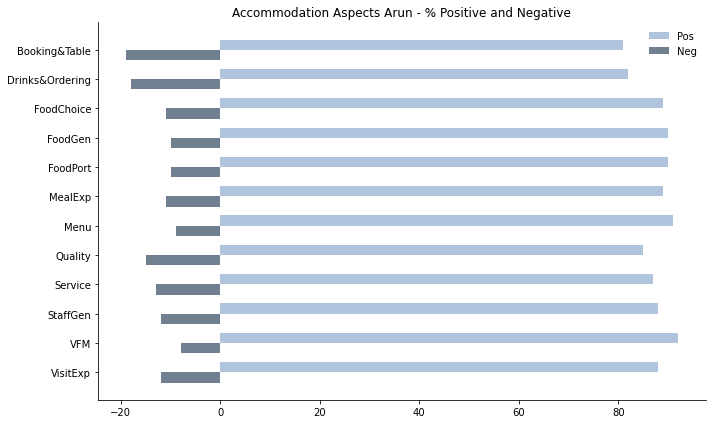

In [160]:
graph_sentiment_numbers("Accommodation Aspects Arun",food_sent)

### Split down by town

In [161]:
arundel_food_aspects_pos = df_food[(df_food["Town"] == "Arundel") & (df_food["Score"] == "positive")]
arundel_food_aspects_neg = df_food[(df_food["Town"] == "Bognor") & (df_food["Score"] == "negative")]
bognor_food_aspects_pos = df_food[(df_food["Town"] == "Bognor") & (df_food["Score"] == "positive")]
bognor_food_aspects_neg = df_food[(df_food["Town"] == "Bognor") & (df_food["Score"] == "negative")]
little_food_aspects_pos = df_food[(df_food["Town"] == "Littlehampton") & (df_food["Score"] == "positive")]
little_food_aspects_neg = df_food[(df_food["Town"] == "Littlehampton") & (df_food["Score"] == "negative")]

### Arundel

In [162]:
arundel_percent_food = aspect_perc(arundel_food_aspects_pos,arundel_food_aspects_neg)
arundel_percent_food

,Num Pos,Num Neg,%Pos,%Neg
Booking&Table,371,74,83.0,17.0
Drinks&Ordering,376,72,84.0,16.0
FoodChoice,376,29,93.0,7.0
FoodGen,1621,191,89.0,11.0
FoodPort,214,25,90.0,10.0
MealExp,426,64,87.0,13.0
Menu,296,28,91.0,9.0
Quality,346,58,86.0,14.0
Service,607,93,87.0,13.0
StaffGen,652,85,88.0,12.0


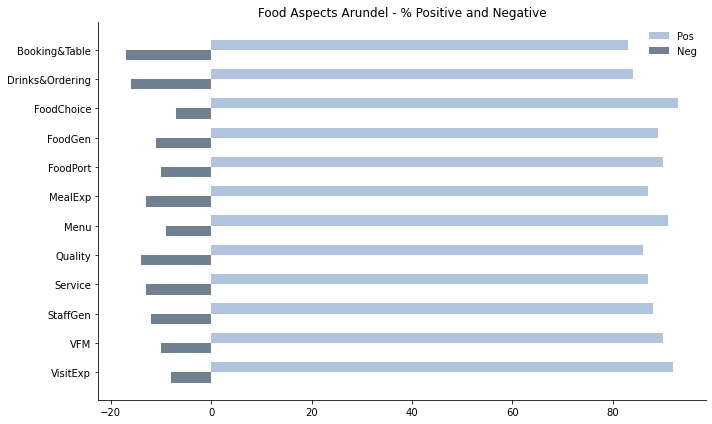

In [163]:
graph_sentiment_numbers("Food Aspects Arundel",arundel_percent_food)

### Bognor

In [164]:
bognor_percent_food = aspect_perc(bognor_food_aspects_pos,bognor_food_aspects_neg)
bognor_percent_food

,Num Pos,Num Neg,%Pos,%Neg
Booking&Table,261,74,78.0,22.0
Drinks&Ordering,270,72,79.0,21.0
FoodChoice,332,29,92.0,8.0
FoodGen,1623,191,89.0,11.0
FoodPort,240,25,91.0,9.0
MealExp,466,64,88.0,12.0
Menu,275,28,91.0,9.0
Quality,318,58,85.0,15.0
Service,722,93,89.0,11.0
StaffGen,627,85,88.0,12.0


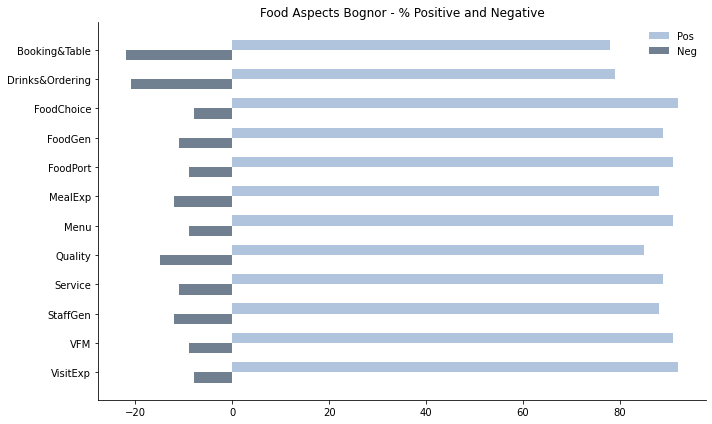

In [165]:
graph_sentiment_numbers("Food Aspects Bognor",bognor_percent_food)

### Littlehampton

In [166]:
little_percent_food = aspect_perc(little_food_aspects_pos,little_food_aspects_neg)
little_percent_food

,Num Pos,Num Neg,%Pos,%Neg
Booking&Table,305,81,79.0,21.0
Drinks&Ordering,261,54,83.0,17.0
FoodChoice,268,51,84.0,16.0
FoodGen,1276,168,88.0,12.0
FoodPort,197,23,90.0,10.0
MealExp,389,57,87.0,13.0
Menu,241,29,89.0,11.0
Quality,291,61,83.0,17.0
Service,491,79,86.0,14.0
StaffGen,483,85,85.0,15.0


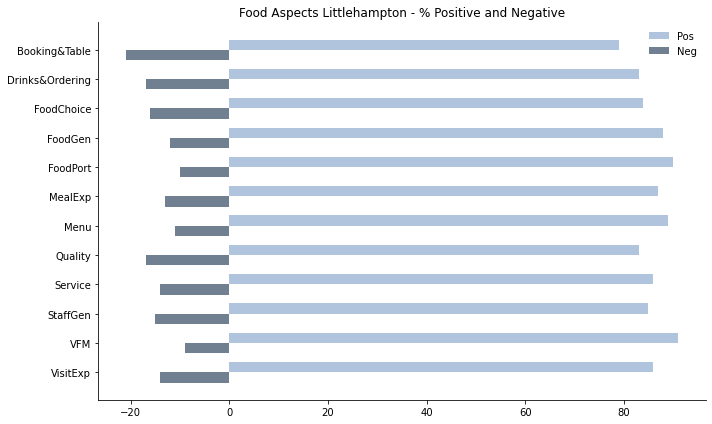

In [167]:
graph_sentiment_numbers("Food Aspects Littlehampton",little_percent_food)

### Attractions

In [278]:
attract_sent = aspect_all(df_attract)
attract_sent

,Num Pos,Num Neg,%Pos,%Neg
Attraction,174,16,92.0,8.0
BeachFac,243,23,91.0,9.0
FamilyExp,473,39,92.0,8.0
Food,288,42,87.0,13.0
Gardens&Grounds,226,16,93.0,7.0
Parking,123,19,87.0,13.0
PlayArea,288,56,84.0,16.0
Shop&Facilities,221,23,91.0,9.0
Staff,240,14,94.0,6.0
VFM,219,47,82.0,18.0


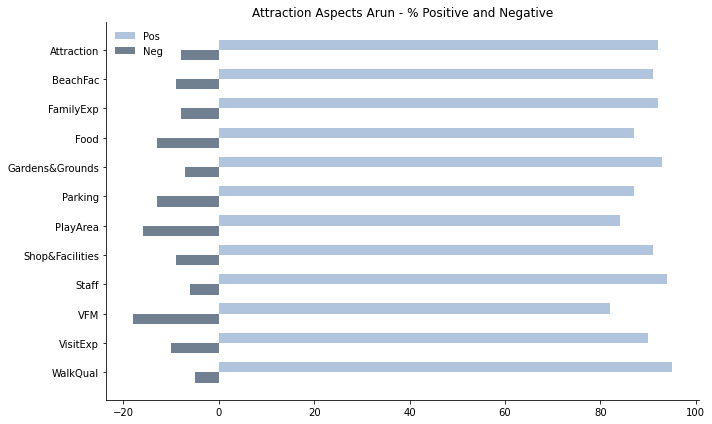

In [279]:
graph_sentiment_numbers("Attraction Aspects Arun",attract_sent)

## Split down by town

In [280]:
arundel_attract_aspects_pos = df_attract[(df_attract["Town"] == "Arundel") & (df_attract["Score"] == "positive")]
arundel_attract_aspects_neg = df_attract[(df_attract["Town"] == "Bognor") & (df_attract["Score"] == "negative")]
bognor_attract_aspects_pos = df_attract[(df_attract["Town"] == "Bognor") & (df_attract["Score"] == "positive")]
bognor_attract_aspects_neg = df_attract[(df_attract["Town"] == "Bognor") & (df_attract["Score"] == "negative")]
little_attract_aspects_pos = df_attract[(df_attract["Town"] == "Littlehampton") & (df_attract["Score"] == "positive")]
little_attract_aspects_neg = df_attract[(df_attract["Town"] == "Littlehampton") & (df_attract["Score"] == "negative")]

### Arundel

In [281]:
arundel_percent_attract = aspect_perc(arundel_attract_aspects_pos,arundel_attract_aspects_neg)
arundel_percent_attract

,Num Pos,Num Neg,%Pos,%Neg
Attraction,97,5,95.0,5.0
BeachFac,106,12,90.0,10.0
FamilyExp,257,11,96.0,4.0
Food,153,4,97.0,3.0
Gardens&Grounds,202,2,99.0,1.0
Parking,44,8,85.0,15.0
PlayArea,164,16,91.0,9.0
Shop&Facilities,152,9,94.0,6.0
Staff,140,3,98.0,2.0
VFM,63,25,72.0,28.0


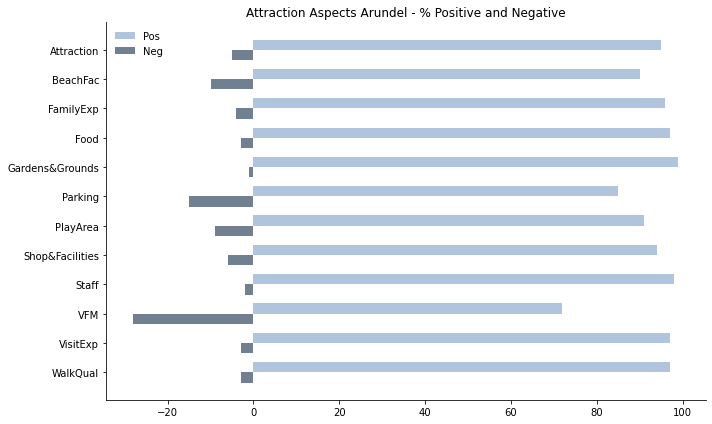

In [283]:
graph_sentiment_numbers("Attraction Aspects Arundel",arundel_percent_attract)

### Bognor

In [284]:
bognor_percent_attract = aspect_perc(bognor_attract_aspects_pos,bognor_attract_aspects_neg)
bognor_percent_attract

,Num Pos,Num Neg,%Pos,%Neg
Attraction,51,5,91.0,9.0
BeachFac,47,12,80.0,20.0
FamilyExp,145,11,93.0,7.0
Food,84,4,95.0,5.0
Gardens&Grounds,17,2,89.0,11.0
Parking,59,8,88.0,12.0
PlayArea,63,16,80.0,20.0
Shop&Facilities,39,9,81.0,19.0
Staff,58,3,95.0,5.0
VFM,111,25,82.0,18.0


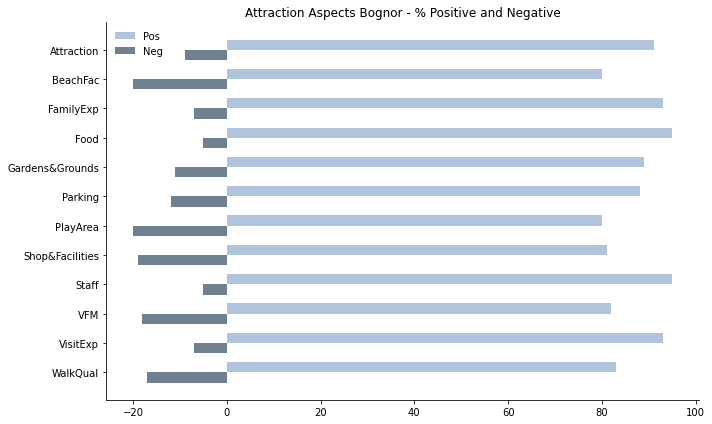

In [285]:
graph_sentiment_numbers("Attraction Aspects Bognor",bognor_percent_attract)

### Littlehampton

In [286]:
little_percent_attract = aspect_perc(little_attract_aspects_pos,little_attract_aspects_neg)
little_percent_attract

,Num Pos,Num Neg,%Pos,%Neg
Attraction,26,4.0,87.0,13.0
BeachFac,90,8.0,92.0,8.0
FamilyExp,71,6.0,92.0,8.0
Food,51,13.0,80.0,20.0
Gardens&Grounds,7,NaN,NaN,NaN
Parking,20,3.0,87.0,13.0
PlayArea,61,7.0,90.0,10.0
Shop&Facilities,30,6.0,83.0,17.0
Staff,42,3.0,93.0,7.0
VFM,45,11.0,80.0,20.0


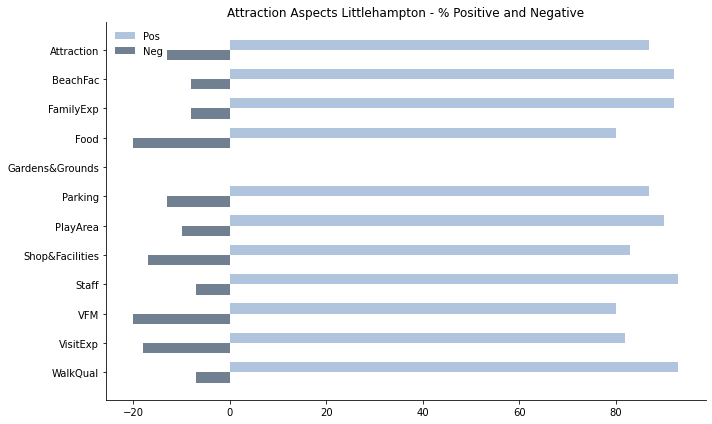

In [287]:
graph_sentiment_numbers("Attraction Aspects Littlehampton",little_percent_attract)

# Section 4: Sentiment Scores across categories

Across the district, what aspects were people most positive about?

## Accommodation

In [180]:
accom_summary = df_accom[df_accom["Sentiment"]!=0].groupby("Topic Count",as_index = False)["Sentiment"].mean()
accom_summary = accom_summary.sort_values(by = "Sentiment",ascending = False)
accom_summary

,Topic Count,Sentiment
1,FamilyExp,0.456659
3,HotelGen,0.433417
2,Food,0.418877
12,Service&Staff,0.417853
5,Location,0.401224
10,RoomFac,0.391602
9,RoomComf,0.383521
13,Value,0.365011
0,CustServ,0.350991
8,Room,0.344654


In [222]:
def plot_sent_score(df,name,name2):
    
    labels = list(df["Topic Count"])
    sent = list(df["Sentiment"])
  
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize = (10,7))
    ax.barh(x, sent, width, label='Sentiment Score',color = "lightsteelblue",ec = "grey")
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title(name + " - Mean Sentiment Score " + name2)
    ax.set_yticks(x)
    ax.set_yticklabels(labels)
    ax.set_xlabel("Mean Sentiment Score",labelpad = 15)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend(frameon = False, loc = "best")
    ax.invert_yaxis()

    fig.tight_layout()

    plt.show()

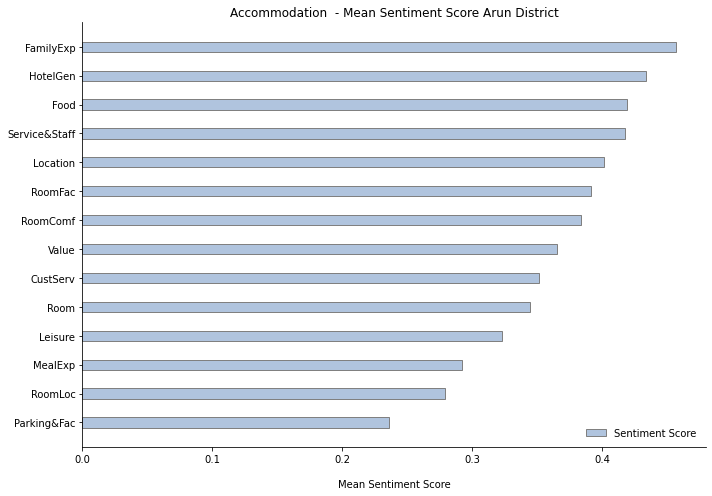

In [223]:
plot_sent_score(accom_summary,"Accommodation ","Arun District")

In [224]:
food_summary = df_food[df_food["Sentiment"]!=0].groupby("Topic Count",as_index = False)["Sentiment"].mean()
food_summary = food_summary.sort_values(by = "Sentiment",ascending = False)
food_summary

,Topic Count,Sentiment
10,VFM,0.528907
3,FoodGen,0.445900
6,Menu,0.445216
8,Service,0.433239
2,FoodChoice,0.424930
9,StaffGen,0.423365
5,MealExp,0.415796
4,FoodPort,0.408770
11,VisitExp,0.375560
7,Quality,0.372281


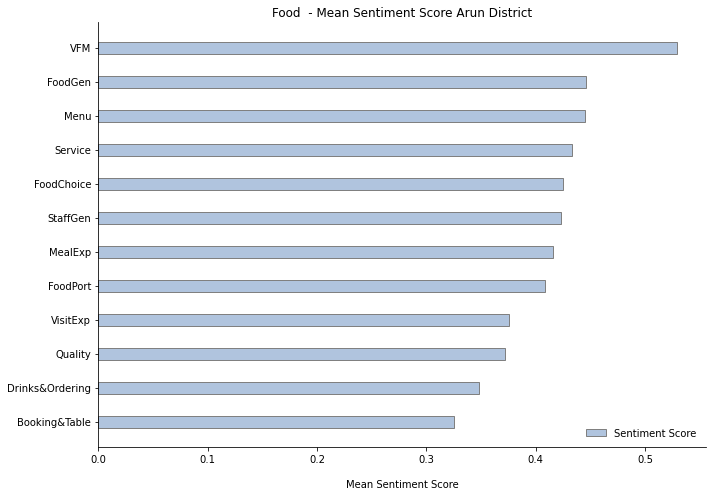

In [225]:
plot_sent_score(food_summary,"Food ","Arun District")

In [226]:
attract_summary = df_attract[df_attract["Sentiment"]!=0].groupby("Topic Count",as_index = False)["Sentiment"].mean()
attract_summary = attract_summary.sort_values(by = "Sentiment",ascending = False)
attract_summary

,Topic Count,Sentiment
8,Staff,0.491984
4,Gardens&Grounds,0.490489
11,WalkQual,0.474575
2,FamilyExp,0.473619
0,Attraction,0.467121
7,Shop&Facilities,0.437296
1,BeachFac,0.425034
9,VFM,0.401489
5,Parking,0.400223
3,Food,0.391559


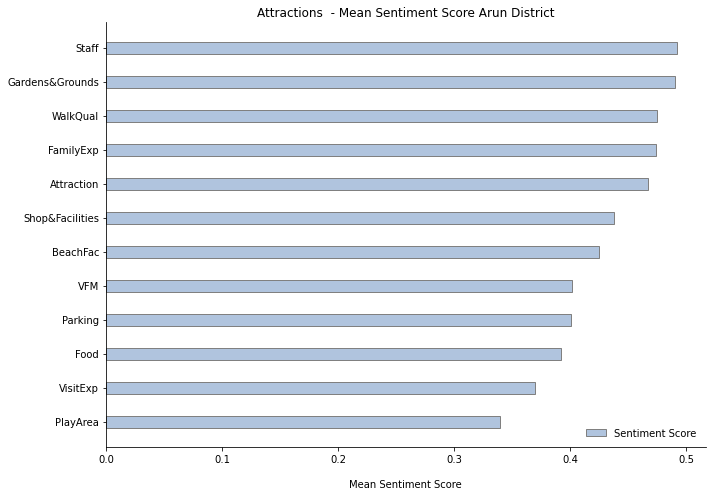

In [227]:
plot_sent_score(attract_summary,"Attractions ","Arun District")

# Section 5: Mean Sentiment Score Analysis By Town

## Accommodation

In [229]:
towns_accom = df_accom.groupby(["Topic Count","Town"],as_index = False)["Sentiment"].mean()
arundel_accom = towns_accom[towns_accom["Town"] == "Arundel"]
bognor_accom = towns_accom[towns_accom["Town"] == "Bognor"]
little_accom = towns_accom[towns_accom["Town"] == "Littlehampton"]

### Arundel

In [230]:
arundel_accom = arundel_accom.sort_values(by = "Sentiment",ascending = False)
arundel_accom

,Topic Count,Town,Sentiment
36,Service&Staff,Arundel,0.308913
39,Value,Arundel,0.298060
6,Food,Arundel,0.240892
15,Location,Arundel,0.214857
0,CustServ,Arundel,0.212689
3,FamilyExp,Arundel,0.202033
27,RoomComf,Arundel,0.200892
24,Room,Arundel,0.192906
9,HotelGen,Arundel,0.183598
30,RoomFac,Arundel,0.141994


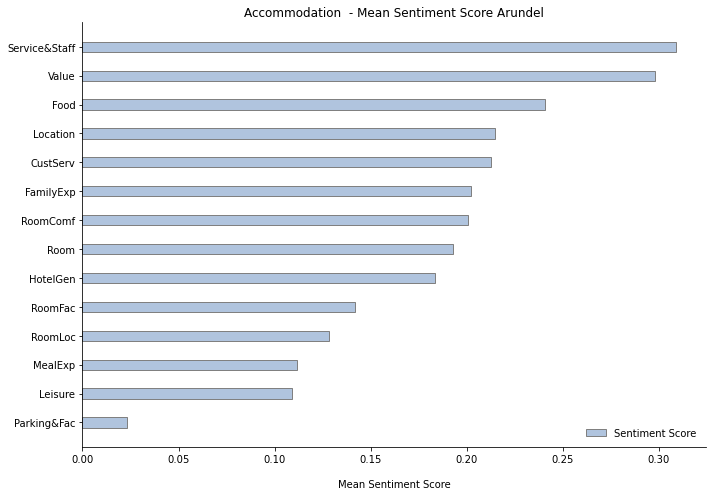

In [231]:
plot_sent_score(arundel_accom,"Accommodation ","Arundel")

### Bognor

In [232]:
bognor_accom = bognor_accom.sort_values(by = "Sentiment",ascending = False)
bognor_accom

,Topic Count,Town,Sentiment
37,Service&Staff,Bognor,0.234083
7,Food,Bognor,0.207672
4,FamilyExp,Bognor,0.200651
28,RoomComf,Bognor,0.178872
31,RoomFac,Bognor,0.173958
1,CustServ,Bognor,0.169251
40,Value,Bognor,0.164775
16,Location,Bognor,0.139344
25,Room,Bognor,0.131073
10,HotelGen,Bognor,0.121275


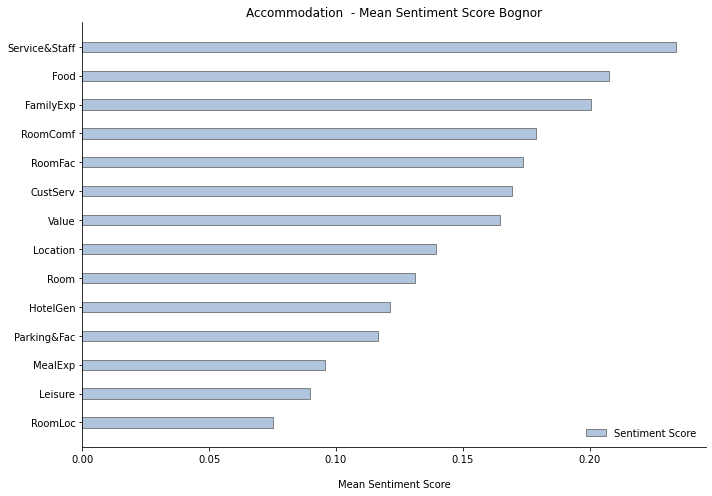

In [233]:
plot_sent_score(bognor_accom,"Accommodation ","Bognor")

### Littlehampton

In [234]:
little_accom = little_accom.sort_values(by = "Sentiment",ascending = False)
little_accom

,Topic Count,Town,Sentiment
38,Service&Staff,Littlehampton,0.292723
5,FamilyExp,Littlehampton,0.224184
11,HotelGen,Littlehampton,0.218336
8,Food,Littlehampton,0.213851
41,Value,Littlehampton,0.212601
2,CustServ,Littlehampton,0.192361
29,RoomComf,Littlehampton,0.185923
17,Location,Littlehampton,0.182033
32,RoomFac,Littlehampton,0.165071
26,Room,Littlehampton,0.163390


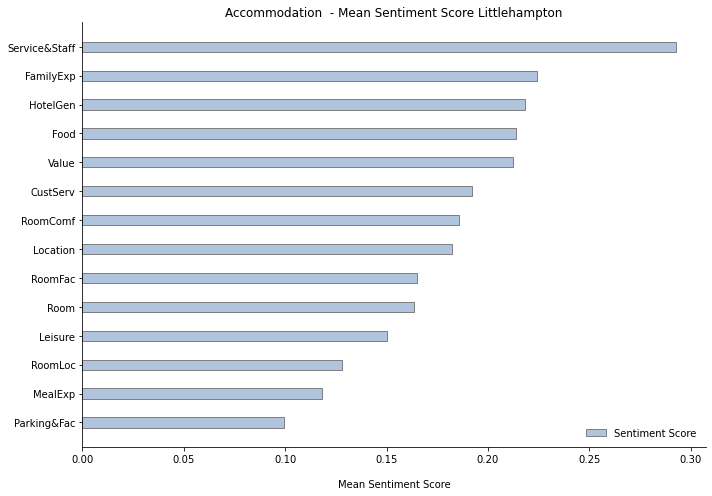

In [235]:
plot_sent_score(little_accom,"Accommodation ","Littlehampton")

## Food

In [237]:
towns_food  = df_food.groupby(["Topic Count","Town"],as_index = False)["Sentiment"].mean()
arundel_food = towns_food[towns_food["Town"] == "Arundel"]
bognor_food = towns_food[towns_food["Town"] == "Bognor"]
little_food = towns_food[towns_food["Town"] == "Littlehampton"]

### Arundel

In [238]:
arundel_food = arundel_food.sort_values(by = "Sentiment",ascending = False)
arundel_food

,Topic Count,Town,Sentiment
30,VFM,Arundel,0.353125
24,Service,Arundel,0.284518
9,FoodGen,Arundel,0.279412
27,StaffGen,Arundel,0.259842
15,MealExp,Arundel,0.197140
21,Quality,Arundel,0.179242
6,FoodChoice,Arundel,0.171906
18,Menu,Arundel,0.167108
3,Drinks&Ordering,Arundel,0.164939
0,Booking&Table,Arundel,0.154315


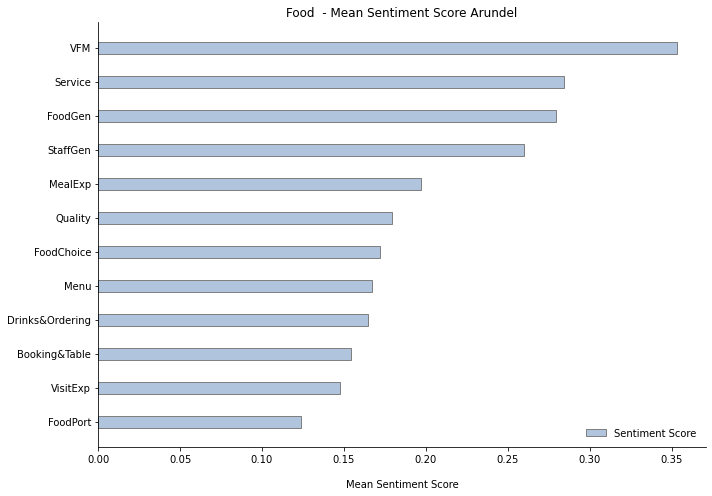

In [239]:
plot_sent_score(arundel_food,"Food ","Arundel")

### Bognor

In [240]:
bognor_food = bognor_food.sort_values(by = "Sentiment",ascending = False)
bognor_food

,Topic Count,Town,Sentiment
31,VFM,Bognor,0.369052
25,Service,Bognor,0.292866
10,FoodGen,Bognor,0.257764
28,StaffGen,Bognor,0.255858
22,Quality,Bognor,0.183581
16,MealExp,Bognor,0.176776
7,FoodChoice,Bognor,0.156005
19,Menu,Bognor,0.151756
34,VisitExp,Bognor,0.140476
13,FoodPort,Bognor,0.126659


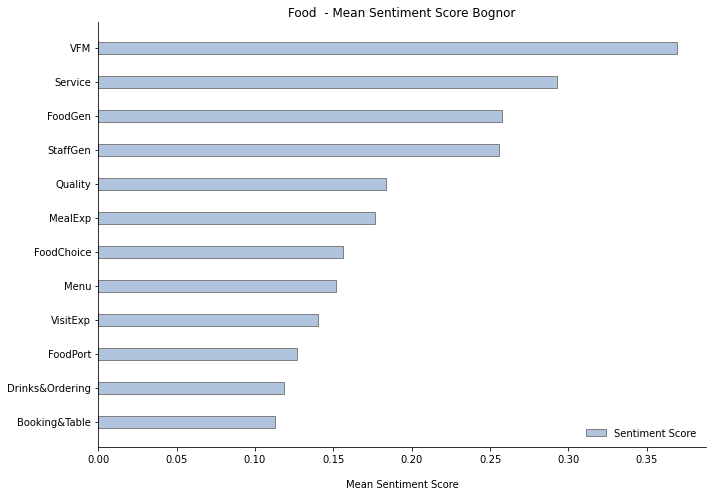

In [241]:
plot_sent_score(bognor_food,"Food ","Bognor")

### Littlehampton

In [242]:
little_food = little_food.sort_values(by = "Sentiment",ascending = False)
little_food

,Topic Count,Town,Sentiment
32,VFM,Littlehampton,0.338398
26,Service,Littlehampton,0.268844
11,FoodGen,Littlehampton,0.239434
29,StaffGen,Littlehampton,0.222891
23,Quality,Littlehampton,0.177917
17,MealExp,Littlehampton,0.176176
20,Menu,Littlehampton,0.145559
8,FoodChoice,Littlehampton,0.134869
2,Booking&Table,Littlehampton,0.128208
14,FoodPort,Littlehampton,0.123009


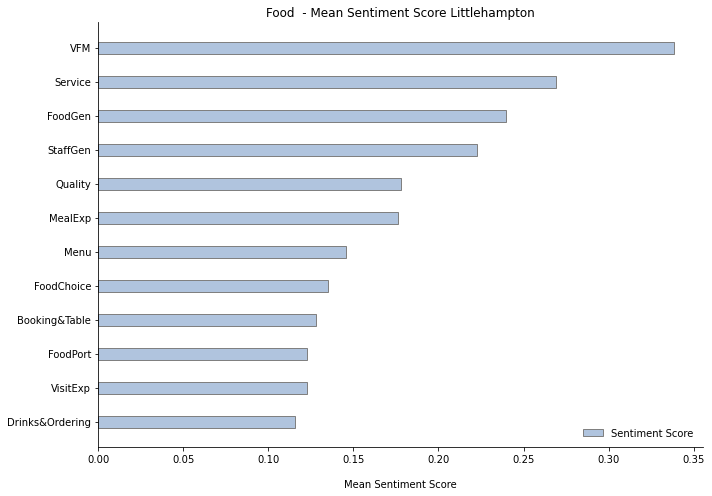

In [243]:
plot_sent_score(little_food,"Food ","Littlehampton")

## Attractions

In [244]:
towns_attract  = df_attract.groupby(["Topic Count","Town"],as_index = False)["Sentiment"].mean()
arundel_attract = towns_attract[towns_attract["Town"] == "Arundel"]
bognor_attract = towns_attract[towns_attract["Town"] == "Bognor"]
little_attract = towns_attract[towns_attract["Town"] == "Littlehampton"]

### Arundel

In [245]:
arundel_attract = arundel_attract.sort_values(by = "Sentiment",ascending = False)
arundel_attract

,Topic Count,Town,Sentiment
24,Staff,Arundel,0.288539
0,Attraction,Arundel,0.281993
27,VFM,Arundel,0.265130
3,BeachFac,Arundel,0.251211
12,Gardens&Grounds,Arundel,0.249136
33,WalkQual,Arundel,0.223913
21,Shop&Facilities,Arundel,0.215749
6,FamilyExp,Arundel,0.181612
30,VisitExp,Arundel,0.171837
9,Food,Arundel,0.142769


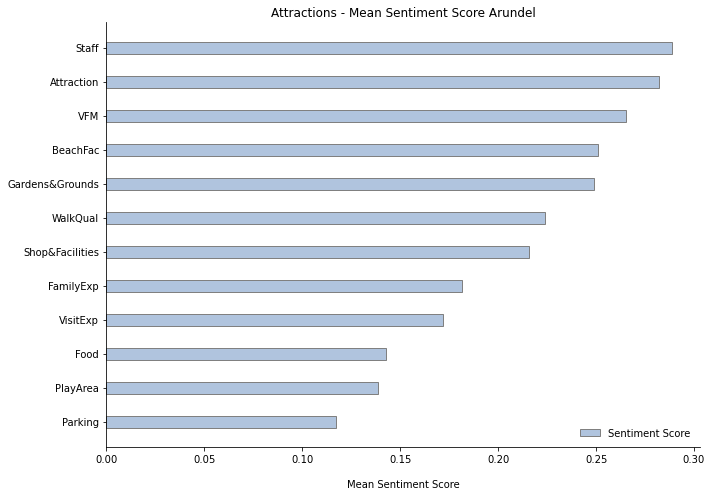

In [247]:
plot_sent_score(arundel_attract,"Attractions","Arundel")

### Bognor

In [248]:
bognor_attract = bognor_attract.sort_values(by = "Sentiment",ascending = False)
bognor_attract

,Topic Count,Town,Sentiment
1,Attraction,Bognor,0.323808
28,VFM,Bognor,0.280409
25,Staff,Bognor,0.276823
7,FamilyExp,Bognor,0.247197
16,Parking,Bognor,0.213854
10,Food,Bognor,0.213297
13,Gardens&Grounds,Bognor,0.206565
31,VisitExp,Bognor,0.190637
22,Shop&Facilities,Bognor,0.148849
4,BeachFac,Bognor,0.138497


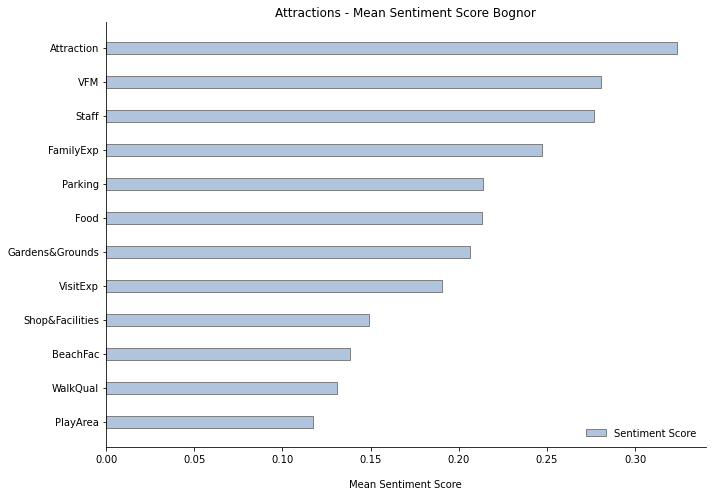

In [249]:
plot_sent_score(bognor_attract,"Attractions","Bognor")

### Littlehampton

In [250]:
little_attract = little_attract.sort_values(by = "Sentiment",ascending = False)
little_attract

,Topic Count,Town,Sentiment
14,Gardens&Grounds,Littlehampton,0.311691
26,Staff,Littlehampton,0.271453
2,Attraction,Littlehampton,0.241339
8,FamilyExp,Littlehampton,0.231410
35,WalkQual,Littlehampton,0.228164
29,VFM,Littlehampton,0.214897
5,BeachFac,Littlehampton,0.184823
32,VisitExp,Littlehampton,0.164048
20,PlayArea,Littlehampton,0.163803
11,Food,Littlehampton,0.157654


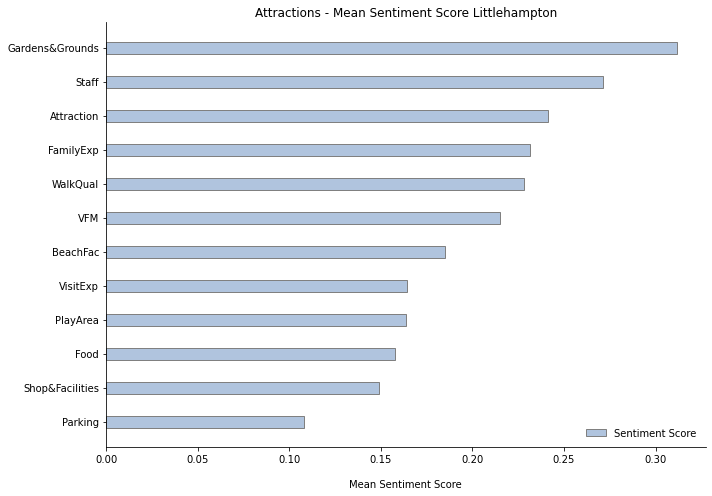

In [251]:
plot_sent_score(little_attract,"Attractions","Littlehampton")

# Section 5: Comparing Aspects and Towns Together

In [273]:
def compare_towns(df1,df2,df3,name):
    
    # Set variables
    labels = list(df1["Topic Count"])
    
    y1 = list(df1["Sentiment"])
    y2 = list(df2["Sentiment"])
    y3 = list(df3["Sentiment"])
    height = 0.25
    
    r1 = np.arange(len(y1))
    r2 = [x + height for x in r1]
    r3 = [x + height for x in r2]
    
    # Plot chart
    fig, ax = plt.subplots(figsize = (14,12),)
    plt.barh(r1, y1, height = height, color = "lightgrey",label='Arundel',ec = "darkgrey")
    plt.barh(r2, y2, height = height, color = "lightsteelblue",label='Bognor',ec = "darkgrey")
    plt.barh(r3, y3, height = height, label='Littlehampton',ec = "darkgrey")
    
    # Set labels, legend etc
    ax.set_xlabel('Compound Sentiment Score',labelpad = 10,fontsize = 12)
    ax.set_ylabel("Topic", labelpad = 10,fontsize = 12)
    plt.yticks([r + height for r in range(len(y1))], labels)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_title(name + " - Mean Sentiment Score ",fontsize = 15)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels),frameon = False)
    ax.invert_yaxis()
    plt.show()

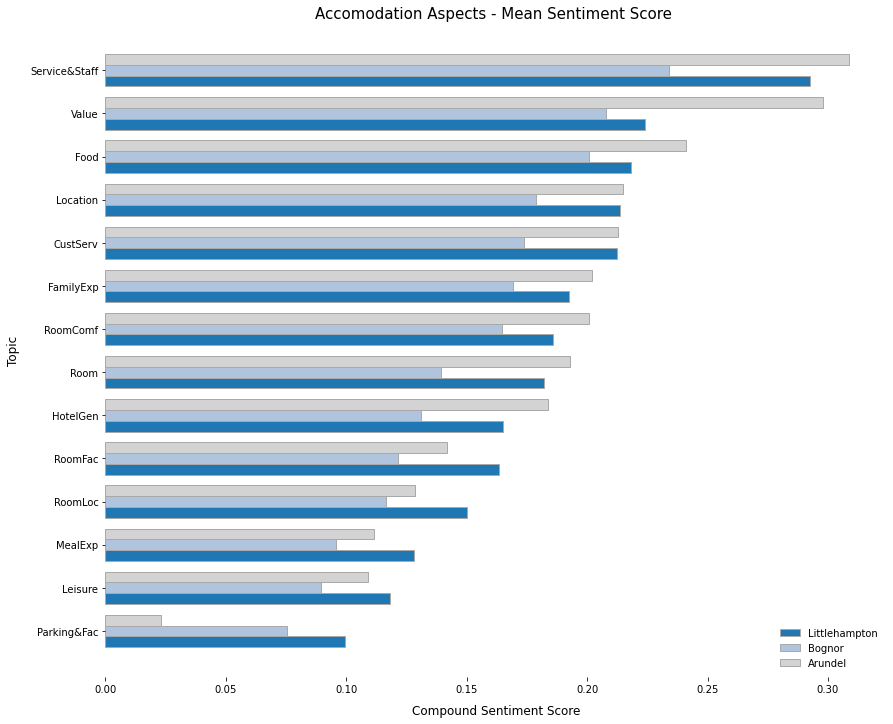

In [274]:
compare_towns(arundel_accom,bognor_accom,little_accom,"Accomodation Aspects")

* Bognor scores the lowest in all categories except Parking & Facilities
* Parking, leisure facilities and meal experiences are among the lowest sentiment scores
* Arundel and Littlehampton score highly for Staff and Service
* Arundel scores highly for value


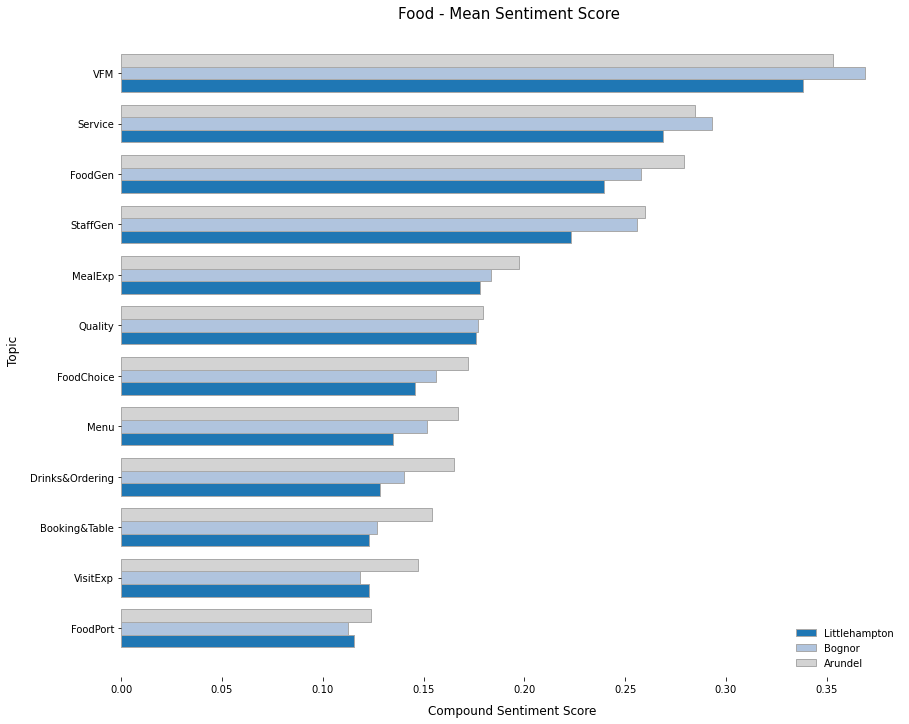

In [275]:
compare_towns(arundel_food,bognor_food,little_food,"Food")

* All towns score highly for value for money with Bognor having the highest average compound sentiment score
* Bognor also scores highest for service
* The lowest scored category is Food Portions and Visit Experience

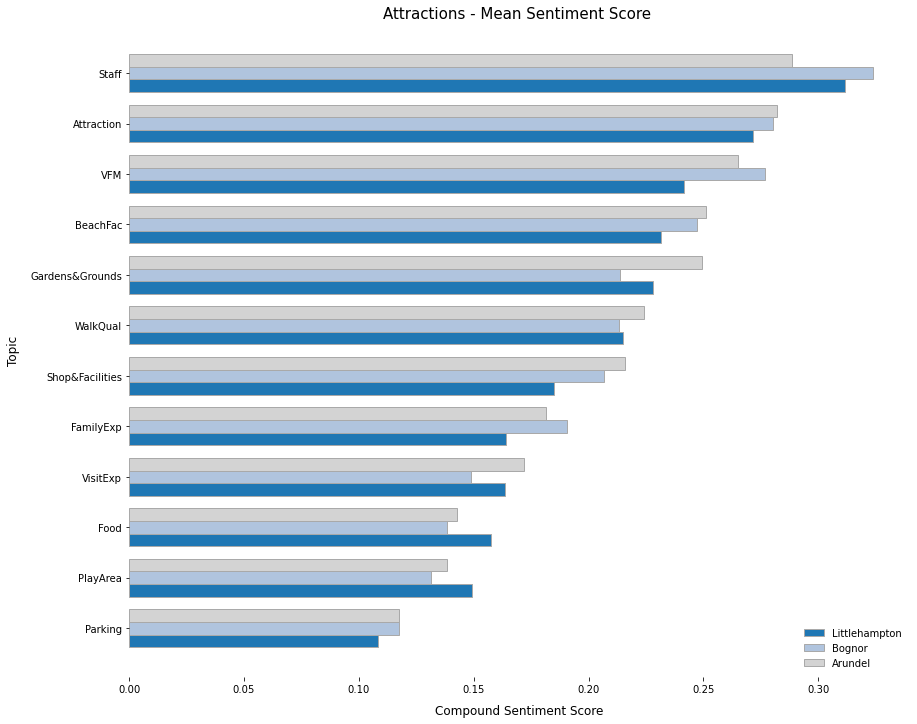

In [276]:
compare_towns(arundel_attract,bognor_attract,little_attract,"Attractions")

* The aspect with the highest mean sentiment score is 'Staff' and Bognor scores the highest of these
* Bognor also scores highest for value for money attractions
* Among the lowest scored aspects relating to attractions are parking, play facilities and food

In [ ]:
# Implode dataframe back to sentence level from noun phrase level
#df_comb = df.groupby(["OrigInd","Category","Town","Rating","all_text","sentences","cleaned_sentences"]).agg({'noun_phrases':lambda x: " ".join(x)}).rename({'noun_phrases':'sentence'},axis = 1).reset_index()
#df_comb.drop(columns = ["sentence"],axis = 1,inplace = True)